In [2]:
import pandas as pd

# List of file paths and their attributes
file_info = [
    ('/Users/SASANKYADAV1/Desktop/CAPSTONE PROJECT/Sponsor Data/2022_eShop.csv','eShop'),
    ('/Users/SASANKYADAV1/Desktop/CAPSTONE PROJECT/Sponsor Data/2022_non-eShop.csv', 'non-eShop'),
    ('/Users/SASANKYADAV1/Desktop/CAPSTONE PROJECT/Sponsor Data/2023_eShop.csv', 'eShop'),
    ('/Users/SASANKYADAV1/Desktop/CAPSTONE PROJECT/Sponsor Data/2023_non-eShop.csv', 'non-eShop'),
    ('/Users/SASANKYADAV1/Desktop/CAPSTONE PROJECT/Sponsor Data/2024_eShop.csv', 'eShop'),
    ('/Users/SASANKYADAV1/Desktop/CAPSTONE PROJECT/Sponsor Data/2024_non-eShop.csv', 'non-eShop')
]

# Initialize an empty list to store dataframes
dataframes = []

# Load each file, extract year from date, assign sales channel, and append to the list
for path, channel in file_info:
    df = pd.read_csv(path, low_memory=False)  # Use low_memory=False to handle large data
    df['order_date'] = pd.to_datetime(df['order_date'])  # Convert date to datetime format
    df['Year'] = df['order_date'].dt.year  # Extract year from the date
    df['Sales_Channel'] = channel
    dataframes.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the shape of the DataFrame and first few rows to verify
print("Combined DataFrame shape:", combined_df.shape)
print(combined_df.head())

# Check for null values in the DataFrame
null_counts = combined_df.isnull().sum()
print("Null counts in each column:\n", null_counts)


Combined DataFrame shape: (3167194, 13)
  order_date  order_number material_number  order_material_net_value  \
0 2022-05-12     112140438       034.053V4                     40.30   
1 2022-11-28     112656875         109.945                   1559.51   
2 2022-01-31     111858749         118.357                    211.11   
3 2022-02-28     111935927       024.0008S                     39.19   
4 2022-02-01     111861821        025.2205                     58.21   

  sales_channel                   PRH1                         PRH4  \
0         eShop      Implant Solutions  Instruments, Cases + Others   
1         eShop      Implant Solutions   BLAT Ti Implants, standard   
2         eShop  Restorative Solutions            Other Prosthetics   
3         eShop      Implant Solutions          BL Healing Surgical   
4         eShop  Restorative Solutions            Other Prosthetics   

    customer_group       customer_number region  DSO_Ind  Year Sales_Channel  
0       University  3

In [3]:
print(combined_df.describe())


                          order_date  order_number  order_material_net_value  \
count                        3167194  3.167194e+06              3.167194e+06   
mean   2023-03-13 08:12:31.791268352  1.994159e+09              4.188962e+02   
min              2022-01-01 00:00:00  1.117802e+08             -1.251000e+01   
25%              2022-08-17 00:00:00  1.133769e+08              7.389000e+01   
50%              2023-03-20 00:00:00  3.022276e+09              1.924400e+02   
75%              2023-10-10 00:00:00  3.025996e+09              4.420000e+02   
max              2024-04-28 00:00:00  3.029658e+09              2.102800e+05   
std                              NaN  1.392496e+09              9.907860e+02   

               Year  
count  3.167194e+06  
mean   2.022753e+03  
min    2.022000e+03  
25%    2.022000e+03  
50%    2.023000e+03  
75%    2.023000e+03  
max    2.024000e+03  
std    7.048645e-01  


In [4]:
# as my first business question/prediction I want to know the count of customer groups.
print(combined_df['customer_group'].value_counts())

customer_group
General dentist         1583441
Surgeon (gen./oral)      567844
Periodontist             401009
Laboratory               293920
University               127829
Prosthodontist            61644
NOT MAPPED                37844
Maxillofacial surg        22215
Orthodontist              16105
Hospital/Clinic           15173
In-house Laboratory        8729
Others                     7034
Government/Military        1430
Distributor/Reseller        621
Staff                       604
Denturist                    89
Central services             54
Institution                  38
Employee                      8
Name: count, dtype: int64


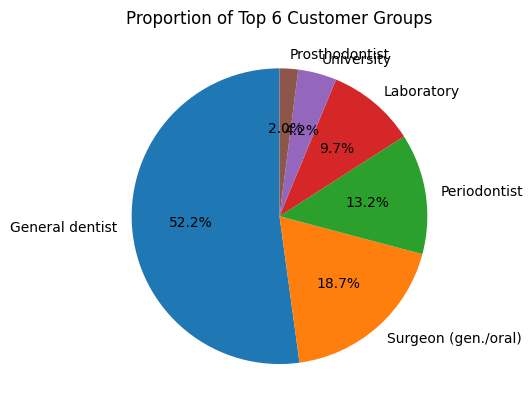

In [5]:
import matplotlib.pyplot as plt

# Calculate value counts for customer_group
customer_group_counts = combined_df['customer_group'].value_counts()

# Focus on the top 6 categories
top_customer_groups = customer_group_counts.head(6)

# Create a pie chart for the top 6 categories
top_customer_groups.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Top 6 Customer Groups')
plt.ylabel('')  # This removes the 'customer_group' label on the side
plt.show()


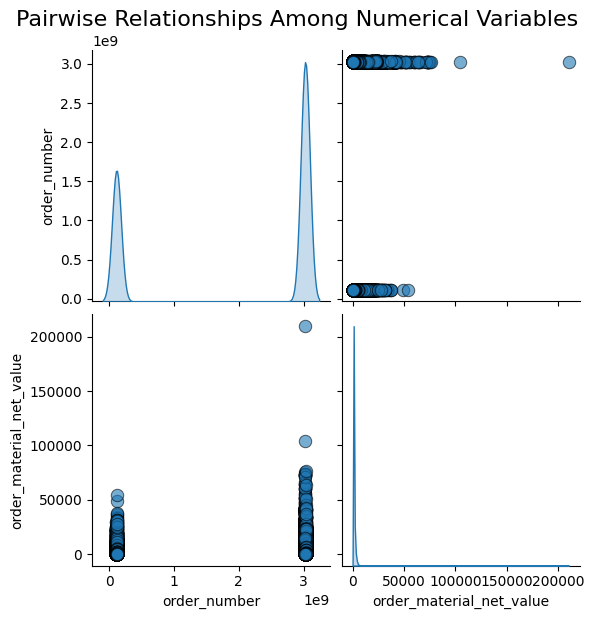

In [6]:
import seaborn as sns
# Select a subset of columns if the dataset is very large, or use all numerical columns for smaller datasets
numerical_columns = combined_df.select_dtypes(include=['float64', 'int64']).columns

# Create a pair plot
sns.pairplot(combined_df[numerical_columns], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height=3)
plt.suptitle('Pairwise Relationships Among Numerical Variables', size=16, y=1.02)
plt.show()


In [7]:
#business question 1:which cust group contributed the most to our revenue and how can we tailor our marketing strat to better engage these segments.

import plotly.express as px
# Calculate total 'order_material_net_value' for each customer group
group_totals = combined_df.groupby('customer_group')['order_material_net_value'].sum().sort_values(ascending=False)

# Select the top 10 customer groups
top_groups = group_totals.head(10)

# Create a DataFrame for the plot
top_groups_df = top_groups.reset_index()
top_groups_df.columns = ['Customer Group', 'Total Order Material Net Value']

# Create an interactive horizontal bar chart
fig = px.bar(top_groups_df, x='Total Order Material Net Value', y='Customer Group',
             title='Top 10 Customer Groups by Total Order Material Net Value',
             labels={'Total Order Material Net Value': 'Total Order Material Net Value', 'Customer Group': 'Customer Group'},
             orientation='h', color='Customer Group',  # Color by customer group
             height=500, text='Total Order Material Net Value')  # Display values on bars

# Customize hover data
fig.update_traces(hovertemplate='Customer Group: %{y}<br>Total Order Material Net Value: $%{x}<extra></extra>')

# Adjust layout for readability
fig.update_layout(xaxis_title='Total Order Material Net Value ($)',
                  yaxis_title='Customer Group',
                  coloraxis_showscale=False)  # Hide color scale if not needed

fig.show()


In [8]:
#Business question-2 :if you know which cust_group refers which product (combinations(prh4)), you can design more effective marketing campaigns that are directly relavant to needs and interest of groups.

import plotly.express as px

# Summarize data
bubble_data = combined_df.groupby(['PRH4', 'customer_group']).size().reset_index(name='counts')
top_10_prh4 = bubble_data.groupby('PRH4')['counts'].sum().nlargest(10).index

# Filter for top 10 PRH4 categories
top_10_data = bubble_data[bubble_data['PRH4'].isin(top_10_prh4)]

# Create the bubble chart
fig = px.scatter(top_10_data, x='customer_group', y='PRH4', size='counts', color='PRH4',
                 hover_name='customer_group', size_max=60, title="Top 10 PRH4 Categories Among All Customer Groups")
fig.update_layout(xaxis_title="Customer Group", yaxis_title="Product Hierarchy 4 (PRH4)")
fig.show()


In [9]:
import plotly.express as px

# Calculate total 'order_material_net_value' for each product (PRH4)
product_totals = combined_df.groupby('PRH4')['order_material_net_value'].sum().sort_values(ascending=False)

# Select the top 10 products
top_products = product_totals.head(10)

# Create a DataFrame for the plot
top_products_df = top_products.reset_index()
top_products_df.columns = ['Product (PRH4)', 'Total Order Material Net Value']

# Create an interactive horizontal bar chart
fig = px.bar(top_products_df, x='Total Order Material Net Value', y='Product (PRH4)',
             title='Top 10 Products by Total Order Material Net Value',
             labels={'Total Order Material Net Value': 'Total Order Material Net Value', 'Product (PRH4)': 'Product (PRH4)'},
             orientation='h', color='Product (PRH4)',  # Color by product
             height=500, text='Total Order Material Net Value')  # Display values on bars

# Customize hover data
fig.update_traces(hovertemplate='Product (PRH4): %{y}<br>Total Order Material Net Value: $%{x}<extra></extra>')

# Adjust layout for readability
fig.update_layout(xaxis_title='Total Order Material Net Value ($)',
                  yaxis_title='Product (PRH4)',
                  coloraxis_showscale=False)  # Hide color scale if not needed

fig.show()


We can say that the cusomer group who bought BLAT TiZr Implants has high chance they bought hydrophilic andhydrophilicTF. So these can be one combination.

In [10]:
import pandas as pd

# Assuming combined_df is already defined and contains the relevant data
# Calculate total 'order_material_net_value' for each combination of PRH1 and PRH4
product_hierarchy_totals = combined_df.groupby(['PRH1', 'PRH4'])['order_material_net_value'].sum().reset_index()

# Select the top product hierarchies based on total revenue
top_product_hierarchies = product_hierarchy_totals.sort_values(by='order_material_net_value', ascending=False).head(10)

# Merge with customer group and sales channel data
top_product_details = pd.merge(top_product_hierarchies, combined_df, on=['PRH1', 'PRH4'])

# Check the columns of the merged DataFrame
print(top_product_details.columns)

# Calculate the contribution of customer groups and sales channels to these top product hierarchies
group_channel_contribution = top_product_details.groupby(['PRH1', 'PRH4', 'customer_group', 'sales_channel'])['order_material_net_value_x'].sum().reset_index()

# Create a treemap to display the revenue distribution
fig = px.treemap(group_channel_contribution, path=['PRH1', 'PRH4', 'customer_group', 'sales_channel'], values='order_material_net_value_x',
                 title='Revenue Distribution Across Product Hierarchies, Customer Groups, and Sales Channels',
                 labels={'order_material_net_value_x': 'Total Order Material Net Value'})

# Customize hover data
fig.update_traces(hovertemplate='<b>%{label}</b><br>Revenue: $%{value}<extra></extra>')

fig.show()


Index(['PRH1', 'PRH4', 'order_material_net_value_x', 'order_date',
       'order_number', 'material_number', 'order_material_net_value_y',
       'sales_channel', 'customer_group', 'customer_number', 'region',
       'DSO_Ind', 'Year', 'Sales_Channel'],
      dtype='object')


Business Question: How can we identify the most profitable product hierarchies (PRH1 and PRH4) and optimize our sales strategy for these product categories?
Steps and Implementation:
Calculate Total Revenue for Each Product Hierarchy:

We grouped the data by PRH1 and PRH4 to calculate the total order_material_net_value for each combination.
This helps us understand the revenue contribution of different product categories.
Identify Top Product Hierarchies:

We sorted the product hierarchies based on total revenue and selected the top 10.
This step identifies the top-performing product categories that generate the most revenue.
Analyze Customer Groups and Sales Channels:

We merged the top product hierarchies with the original dataset to include customer groups and sales channels.
We then calculated the revenue contribution of different customer groups and sales channels to these top product hierarchies.
Visualize the Results:

We created a treemap to display the revenue distribution across different product hierarchies, customer groups, and sales channels.
Expected Visualization:
The treemap visualization provides a hierarchical view of the data, showing how revenue is distributed across different levels:

Top Level: The PRH1 categories (broad product categories).
Second Level: The PRH4 categories within each PRH1 (more specific product categories).
Third Level: The customer groups within each PRH4 (who is buying these products).
Fourth Level: The sales channels within each customer group (through which channels the sales are happening).
Interpretation of the Treemap:
Color and Size: Each rectangle in the treemap represents a product hierarchy, customer group,

In [37]:
import plotly.express as px

# Extract month and year from order_date
combined_df['Month'] = combined_df['order_date'].dt.to_period('M').astype(str)

# Calculate monthly sales for each product hierarchy (PRH1 and PRH4)
monthly_sales = combined_df.groupby(['Month', 'PRH1', 'PRH4'])['order_material_net_value'].sum().reset_index()

# Create an interactive line chart for sales trends
fig = px.line(monthly_sales, x='Month', y='order_material_net_value', color='PRH1', line_group='PRH4', 
              title='Monthly Sales Trends for Product Hierarchies',
              labels={'order_material_net_value': 'Total Order Material Net Value', 'Month': 'Month'},
              hover_data={'PRH4': True})

# Customize hover data
fig.update_traces(hovertemplate='Month: %{x}<br>Total Order Material Net Value: $%{y}<br>Product Hierarchy 1: %{customdata[0]}<br>Product Hierarchy 4: %{customdata[1]}<extra></extra>')

# Adjust layout for readability
fig.update_layout(xaxis_title='Month',
                  yaxis_title='Total Order Material Net Value ($)',
                  legend_title='Product Hierarchy 1')

fig.show()


In [38]:
import plotly.express as px

# Calculate total 'order_material_net_value' for each combination of PRH1 and customer_group
sales_distribution = combined_df.groupby(['PRH1', 'customer_group'])['order_material_net_value'].sum().reset_index()

# Create an interactive bar chart for sales distribution
fig = px.bar(sales_distribution, x='PRH1', y='order_material_net_value', color='customer_group',
             title='Total Sales Distribution for Product Hierarchies and Customer Groups',
             labels={'order_material_net_value': 'Total Order Material Net Value', 'PRH1': 'Product Hierarchy 1'})

# Customize hover data
fig.update_traces(hovertemplate='Product Hierarchy 1: %{x}<br>Customer Group: %{trace.name}<br>Total Order Material Net Value: $%{y}<extra></extra>')

# Adjust layout for readability
fig.update_layout(xaxis_title='Product Hierarchy 1',
                  yaxis_title='Total Order Material Net Value ($)',
                  legend_title='Customer Group',
                  barmode='group')

fig.show()


Feature Engineering....

In [39]:
# Aggregate data by customer group and product category (PRH4)
customer_product_data = combined_df.groupby(['customer_group', 'PRH1', 'PRH4']).agg({
    'order_material_net_value': ['sum', 'mean', 'count']
}).reset_index()

# Flatten the MultiIndex columns
customer_product_data.columns = ['customer_group', 'PRH1', 'PRH4', 'total_value', 'avg_value', 'order_count']

# Display the aggregated data
print(customer_product_data.head())


     customer_group                   PRH1                             PRH4  \
0  Central services      Implant Solutions              BL Healing Surgical   
1  Central services      Implant Solutions  BLAT TiZr Implants, hydrophilic   
2  Central services      Implant Solutions      Instruments, Cases + Others   
3  Central services      Implant Solutions       Instruments, Drills + Taps   
4  Central services  Restorative Solutions                   Abutments, SRA   

   total_value    avg_value  order_count  
0       653.92   326.960000            2  
1      6176.08  1235.216000            5  
2       548.09    54.809000           10  
3      2320.31   128.906111           18  
4       405.84   202.920000            2  


clustering....

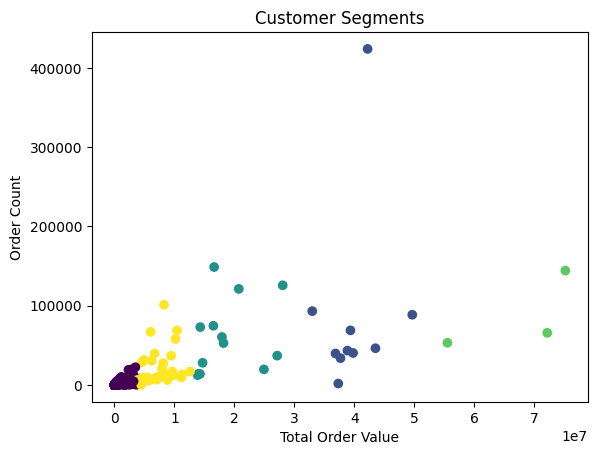

     customer_group                   PRH1                             PRH4  \
0  Central services      Implant Solutions              BL Healing Surgical   
1  Central services      Implant Solutions  BLAT TiZr Implants, hydrophilic   
2  Central services      Implant Solutions      Instruments, Cases + Others   
3  Central services      Implant Solutions       Instruments, Drills + Taps   
4  Central services  Restorative Solutions                   Abutments, SRA   

   total_value    avg_value  order_count  cluster  
0       653.92   326.960000            2        0  
1      6176.08  1235.216000            5        0  
2       548.09    54.809000           10        0  
3      2320.31   128.906111           18        0  
4       405.84   202.920000            2        0  


In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
clustering_features = customer_product_data[['total_value', 'avg_value', 'order_count']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_product_data['cluster'] = kmeans.fit_predict(clustering_features)

# Visualize the clusters
plt.scatter(customer_product_data['total_value'], customer_product_data['order_count'], c=customer_product_data['cluster'], cmap='viridis')
plt.xlabel('Total Order Value')
plt.ylabel('Order Count')
plt.title('Customer Segments')
plt.show()

# Display the first few rows with cluster labels
print(customer_product_data.head())


Association Rule Mining (Market-Basket Analysis).....

In [41]:
# Prepare data for market-basket analysis
basket = (combined_df
          .groupby(['customer_group', 'PRH4'])['order_number']
          .count().unstack().reset_index().fillna(0)
          .set_index('customer_group'))

# Convert values to binary (0 or 1)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Display the prepared basket data
print(basket.head())


PRH4                  Abutments, Customizable  Abutments, Customized  \
customer_group                                                         
Central services                            0                      0   
Denturist                                   0                      0   
Distributor/Reseller                        0                      0   
Employee                                    0                      0   
General dentist                             1                      1   

PRH4                  Abutments, Edentulous  Abutments, SRA  \
customer_group                                                
Central services                          0               1   
Denturist                                 1               1   
Distributor/Reseller                      0               0   
Employee                                  0               0   
General dentist                           1               1   

PRH4                  Abutments, Ti Base  Abutments, 

/var/folders/ml/1sknl6qj14l1s_km288t5qr00000gp/T/ipykernel_33346/181955100.py:8: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Apriori algo....

In [42]:
from itertools import combinations

def apriori(basket, min_support, max_length=5):
    # Convert basket to a list of transactions
    transactions = basket.apply(lambda x: x.index[x > 0].tolist(), axis=1).tolist()

    # Create a dictionary to store the frequency of itemsets
    itemsets = {}

    def get_itemsets(transactions, length):
        # Generate itemsets of a specific length
        return (frozenset(comb) for transaction in transactions for comb in combinations(transaction, length))

    def get_frequent_itemsets(transactions, itemsets, min_support):
        # Calculate the support for each itemset
        itemset_counts = {}
        for transaction in transactions:
            for itemset in itemsets:
                if itemset.issubset(transaction):
                    if itemset in itemset_counts:
                        itemset_counts[itemset] += 1
                    else:
                        itemset_counts[itemset] = 1
        
        # Filter itemsets by min_support
        num_transactions = len(transactions)
        return {itemset: count / num_transactions for itemset, count in itemset_counts.items() if count / num_transactions >= min_support}

    # Generate 1-itemsets
    length = 1
    frequent_itemsets = get_frequent_itemsets(transactions, get_itemsets(transactions, length), min_support)
    all_frequent_itemsets = frequent_itemsets.copy()

    # Generate k-itemsets
    while frequent_itemsets and length < max_length:
        length += 1
        candidate_itemsets = get_itemsets(transactions, length)
        frequent_itemsets = get_frequent_itemsets(transactions, candidate_itemsets, min_support)
        all_frequent_itemsets.update(frequent_itemsets)

    return all_frequent_itemsets

# Run Apriori algorithm with a maximum itemset length of 5 to prevent excessive memory usage
min_support = 0.01
frequent_itemsets = apriori(basket, min_support, max_length=5)

# Display the frequent itemsets
print("Frequent Itemsets:\n", frequent_itemsets)


Frequent Itemsets:
 {frozenset({'Abutments, SRA'}): 0.8947368421052632, frozenset({'BL Healing Surgical'}): 0.8421052631578947, frozenset({'BLAT TiZr Implants, hydrophilic'}): 0.7894736842105263, frozenset({'Copings'}): 0.7894736842105263, frozenset({'Instruments, Cases + Others'}): 0.9473684210526315, frozenset({'Instruments, Drills + Taps'}): 0.8421052631578947, frozenset({'Other Prosthetics'}): 0.8947368421052632, frozenset({'Abutments, SRA', 'BL Healing Surgical'}): 0.8421052631578947, frozenset({'Abutments, SRA', 'BLAT TiZr Implants, hydrophilic'}): 0.7894736842105263, frozenset({'Abutments, SRA', 'Copings'}): 0.7894736842105263, frozenset({'Abutments, SRA', 'Instruments, Cases + Others'}): 0.8947368421052632, frozenset({'Abutments, SRA', 'Instruments, Drills + Taps'}): 0.8421052631578947, frozenset({'Abutments, SRA', 'Other Prosthetics'}): 0.8947368421052632, frozenset({'BL Healing Surgical', 'BLAT TiZr Implants, hydrophilic'}): 0.7894736842105263, frozenset({'BL Healing Surgical

general association rules....

In [43]:
def generate_rules(frequent_itemsets, min_confidence):
    rules = []
    for itemset in frequent_itemsets:
        if len(itemset) > 1:
            for consequence in itemset:
                antecedent = itemset - frozenset([consequence])
                support = frequent_itemsets[itemset]
                confidence = support / frequent_itemsets[antecedent]
                if confidence >= min_confidence:
                    rules.append((antecedent, consequence, support, confidence))
    return rules

# Generate association rules
min_confidence = 0.6
association_rules = generate_rules(frequent_itemsets, min_confidence)

# Display the association rules
print("Association Rules:")
for rule in association_rules:
    print(f"Rule: {set(rule[0])} -> {rule[1]}, Support: {rule[2]}, Confidence: {rule[3]}")


Association Rules:
Rule: {'BL Healing Surgical'} -> Abutments, SRA, Support: 0.8421052631578947, Confidence: 1.0
Rule: {'Abutments, SRA'} -> BL Healing Surgical, Support: 0.8421052631578947, Confidence: 0.9411764705882353
Rule: {'BLAT TiZr Implants, hydrophilic'} -> Abutments, SRA, Support: 0.7894736842105263, Confidence: 1.0
Rule: {'Abutments, SRA'} -> BLAT TiZr Implants, hydrophilic, Support: 0.7894736842105263, Confidence: 0.8823529411764706
Rule: {'Copings'} -> Abutments, SRA, Support: 0.7894736842105263, Confidence: 1.0
Rule: {'Abutments, SRA'} -> Copings, Support: 0.7894736842105263, Confidence: 0.8823529411764706
Rule: {'Instruments, Cases + Others'} -> Abutments, SRA, Support: 0.8947368421052632, Confidence: 0.9444444444444445
Rule: {'Abutments, SRA'} -> Instruments, Cases + Others, Support: 0.8947368421052632, Confidence: 1.0
Rule: {'Instruments, Drills + Taps'} -> Abutments, SRA, Support: 0.8421052631578947, Confidence: 1.0
Rule: {'Abutments, SRA'} -> Instruments, Drills + Ta

predictive modeling....

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Selecting features and target variable
X = combined_df[['customer_group', 'Sales_Channel', 'PRH1']]
y = combined_df['PRH4']

# Identifying categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessing pipeline to the training data
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# Display the shapes to ensure everything is in order
print("Shape of X_train_prepared:", X_train_prepared.shape)
print("Shape of X_test_prepared:", X_test_prepared.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train_prepared: (2533755, 29)
Shape of X_test_prepared: (633439, 29)
Shape of y_train: (2533755,)
Shape of y_test: (633439,)


classification models...

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Fill NaN values in 'PRH4' and 'customer_group'
combined_df['PRH4'].fillna('missing', inplace=True)
combined_df['customer_group'].fillna('missing', inplace=True)

# Selecting features and target variable
X = combined_df[['customer_group', 'Sales_Channel', 'PRH1']]
y = combined_df['PRH4']

# Identifying categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for categorical data with imputation and one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))    # One-hot encode categorical variables
])

# Bundle preprocessing for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessing pipeline to the training data
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# Convert the preprocessed data to DataFrames to check for NaN values
X_train_prepared_df = pd.DataFrame(X_train_prepared.toarray() if hasattr(X_train_prepared, 'toarray') else X_train_prepared)
X_test_prepared_df = pd.DataFrame(X_test_prepared.toarray() if hasattr(X_test_prepared, 'toarray') else X_test_prepared)

# Verify that there are no NaN values
print("NaN values in X_train_prepared after imputation and encoding:\n", X_train_prepared_df.isnull().sum().sum())
print("NaN values in X_test_prepared after imputation and encoding:\n", X_test_prepared_df.isnull().sum().sum())


/var/folders/ml/1sknl6qj14l1s_km288t5qr00000gp/T/ipykernel_33346/3816127905.py:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





NaN values in X_train_prepared after imputation and encoding:
 0
NaN values in X_test_prepared after imputation and encoding:
 0


sgdc....

In [46]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train SGDClassifier model
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

# Make predictions
y_pred_sgd = sgd_clf.predict(X_test_prepared)

# Evaluate the model
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
class_report_sgd = classification_report(y_test, y_pred_sgd)
print("SGDClassifier Accuracy:", accuracy_sgd)
print("Classification Report:\n", class_report_sgd)


/Users/SASANKYADAV1/Library/Python/3.12/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/SASANKYADAV1/Library/Python/3.12/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



SGDClassifier Accuracy: 0.3481219186062115
Classification Report:
                                     precision    recall  f1-score   support

           Abutments, Customizable       0.00      0.00      0.00      1705
             Abutments, Customized       0.00      0.00      0.00         1
             Abutments, Edentulous       0.00      0.00      0.00     16894
                    Abutments, SRA       0.00      0.00      0.00     23866
                Abutments, Ti Base       0.00      0.00      0.00     29364
  Abutments, single tooth + bridge       0.00      0.00      0.00     12409
        Allogenic Bone Substitutes       0.53      0.82      0.64     12749
      Allogenic Soft Tissue Grafts       0.04      0.28      0.07       486
               BL Healing Surgical       0.30      0.38      0.33     78878
     BLAT Ti Implants, hydrophilic       0.11      0.89      0.20     20639
        BLAT Ti Implants, standard       0.00      0.00      0.00     35202
    BLAT Ti Implants

/Users/SASANKYADAV1/Library/Python/3.12/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [47]:
# Use a larger subset of the data for training
subset_df = combined_df.sample(frac=0.3, random_state=42)  # Adjust the fraction as needed

# Fill NaN values in 'PRH4' and 'customer_group'
subset_df['PRH4'].fillna('missing', inplace=True)
subset_df['customer_group'].fillna('missing', inplace=True)

# Selecting features and target variable
X = subset_df[['customer_group', 'Sales_Channel', 'PRH1']]
y = subset_df['PRH4']

# Identifying categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for categorical data with imputation and one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))    # One-hot encode categorical variables
])

# Bundle preprocessing for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessing pipeline to the training data
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# Train SGDClassifier model
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

# Make predictions
y_pred_sgd = sgd_clf.predict(X_test_prepared)

# Evaluate the model
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
class_report_sgd = classification_report(y_test, y_pred_sgd)

print("SGDClassifier Accuracy:", accuracy_sgd)
print("Classification Report:\n", class_report_sgd)


/var/folders/ml/1sknl6qj14l1s_km288t5qr00000gp/T/ipykernel_33346/269995741.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/ml/1sknl6qj14l1s_km288t5qr00000gp/T/ipykernel_33346/269995741.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

SGDClassifier Accuracy: 0.341942409699419
Classification Report:
                                     precision    recall  f1-score   support

           Abutments, Customizable       0.00      0.00      0.00       503
             Abutments, Edentulous       0.00      0.00      0.00      4991
                    Abutments, SRA       0.00      0.00      0.00      7261
                Abutments, Ti Base       0.45      0.01      0.01      8837
  Abutments, single tooth + bridge       0.00      0.00      0.00      3685
        Allogenic Bone Substitutes       0.49      1.00      0.66      3795
      Allogenic Soft Tissue Grafts       0.00      0.00      0.00       151
               BL Healing Surgical       0.30      0.11      0.16     23418
     BLAT Ti Implants, hydrophilic       0.12      0.88      0.20      6312
        BLAT Ti Implants, standard       0.30      0.00      0.00     10590
    BLAT Ti Implants, standard EXT       0.00      0.00      0.00         1
   BLAT TiZr Implants

/Users/SASANKYADAV1/Library/Python/3.12/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [48]:
from sklearn.utils import resample
import numpy as np

# Fill NaN values in 'PRH4' and 'customer_group'
combined_df['PRH4'].fillna('missing', inplace=True)
combined_df['customer_group'].fillna('missing', inplace=True)

# Selecting features and target variable
X = combined_df[['customer_group', 'Sales_Channel', 'PRH1']]
y = combined_df['PRH4']

# Combine X and y into a single dataframe for resampling
df = pd.concat([X, y], axis=1)

# Find the majority class
majority_class = df['PRH4'].value_counts().idxmax()

# Separate majority and minority classes
df_majority = df[df['PRH4'] == majority_class]
df_minority = df[df['PRH4'] != majority_class]

# Upsample minority classes
df_minority_upsampled = resample(
    df_minority,
    replace=True,      # sample with replacement
    n_samples=len(df_majority),  # match number in majority class
    random_state=42   # reproducible results
)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Separate back into X and y
X_upsampled = df_upsampled.drop('PRH4', axis=1)
y_upsampled = df_upsampled['PRH4']

# Identifying categorical columns
categorical_cols = X_upsampled.select_dtypes(include=['object']).columns

# Preprocessing pipeline for categorical data with one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

# Apply the preprocessing pipeline to the training data
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# Convert the preprocessed data to DataFrames to check for NaN values
X_train_prepared_df = pd.DataFrame(X_train_prepared.toarray() if hasattr(X_train_prepared, 'toarray') else X_train_prepared)
X_test_prepared_df = pd.DataFrame(X_test_prepared.toarray() if hasattr(X_test_prepared, 'toarray') else X_test_prepared)

# Verify that there are no NaN values
print("NaN values in X_train_prepared after imputation and encoding:\n", X_train_prepared_df.isnull().sum().sum())
print("NaN values in X_test_prepared after imputation and encoding:\n", X_test_prepared_df.isnull().sum().sum())


NaN values in X_train_prepared after imputation and encoding:
 0
NaN values in X_test_prepared after imputation and encoding:
 0


Random forest...........

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_prepared, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_prepared)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report:\n", class_report_rf)


/Users/SASANKYADAV1/Library/Python/3.12/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/SASANKYADAV1/Library/Python/3.12/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Random Forest Accuracy: 0.6038964909724338
Classification Report:
                                     precision    recall  f1-score   support

           Abutments, Customizable       0.00      0.00      0.00       524
             Abutments, Edentulous       0.00      0.00      0.00      5301
                    Abutments, SRA       0.00      0.00      0.00      7308
                Abutments, Ti Base       0.00      0.00      0.00      9083
  Abutments, single tooth + bridge       0.00      0.00      0.00      3951
        Allogenic Bone Substitutes       0.49      0.99      0.66      3894
      Allogenic Soft Tissue Grafts       0.00      0.00      0.00       156
               BL Healing Surgical       0.24      0.99      0.39     24894
     BLAT Ti Implants, hydrophilic       0.00      0.00      0.00      6517
        BLAT Ti Implants, standard       0.26      0.02      0.03     10938
    BLAT Ti Implants, standard EXT       0.00      0.00      0.00         2
   BLAT TiZr Implant

/Users/SASANKYADAV1/Library/Python/3.12/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

#

# Fill NaN values
combined_df['PRH4'].fillna('missing', inplace=True)
combined_df['customer_group'].fillna('missing', inplace=True)

# Prepare data for market-basket analysis
basket = (combined_df
          .groupby(['customer_group', 'PRH4'])['order_number']
          .count().unstack().reset_index().fillna(0)
          .set_index('customer_group'))

# Convert values to binary (0 or 1)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apriori Algorithm
def apriori(basket, min_support, max_length=5):
    transactions = basket.apply(lambda x: x.index[x > 0].tolist(), axis=1).tolist()
    itemsets = {}
    
    def get_itemsets(transactions, length):
        return (frozenset(comb) for transaction in transactions for comb in combinations(transaction, length))

    def get_frequent_itemsets(transactions, itemsets, min_support):
        itemset_counts = {}
        for transaction in transactions:
            for itemset in itemsets:
                if itemset.issubset(transaction):
                    if itemset in itemset_counts:
                        itemset_counts[itemset] += 1
                    else:
                        itemset_counts[itemset] = 1
        num_transactions = len(transactions)
        return {itemset: count / num_transactions for itemset, count in itemset_counts.items() if count / num_transactions >= min_support}

    length = 1
    frequent_itemsets = get_frequent_itemsets(transactions, get_itemsets(transactions, length), min_support)
    all_frequent_itemsets = frequent_itemsets.copy()

    while frequent_itemsets and length < max_length:
        length += 1
        candidate_itemsets = get_itemsets(transactions, length)
        frequent_itemsets = get_frequent_itemsets(transactions, candidate_itemsets, min_support)
        all_frequent_itemsets.update(frequent_itemsets)

    return all_frequent_itemsets

# Run Apriori algorithm
min_support = 0.01
frequent_itemsets = apriori(basket, min_support, max_length=5)

# Generate Association Rules
def generate_rules(frequent_itemsets, min_confidence):
    rules = []
    for itemset in frequent_itemsets:
        if len(itemset) > 1:
            for consequence in itemset:
                antecedent = itemset - frozenset([consequence])
                support = frequent_itemsets[itemset]
                confidence = support / frequent_itemsets[antecedent]
                if confidence >= min_confidence:
                    rules.append((antecedent, consequence, support, confidence))
    return rules

# Generate association rules
min_confidence = 0.6
association_rules = generate_rules(frequent_itemsets, min_confidence)

# Display the association rules
for rule in association_rules:
    print(f"Rule: {set(rule[0])} -> {rule[1]}, Support: {rule[2]}, Confidence: {rule[3]}")

# Create Dropdowns
customer_groups = combined_df['customer_group'].unique()
prh1_categories = combined_df['PRH1'].unique()

# Create Dropdown Widgets
from IPython.display import display
import ipywidgets as widgets

customer_group_dropdown = widgets.Dropdown(
    options=customer_groups,
    description='Customer Group:'
)
prh1_dropdown = widgets.Dropdown(
    options=prh1_categories,
    description='PRH1:'
)

def update_prh4(*args):
    selected_customer_group = customer_group_dropdown.value
    selected_prh1 = prh1_dropdown.value

    # Filter based on selected customer group and PRH1
    filtered_data = combined_df[(combined_df['customer_group'] == selected_customer_group) & (combined_df['PRH1'] == selected_prh1)]
    prh4_combinations = filtered_data['PRH4'].unique()

    print(f"Possible PRH4 Combinations for {selected_customer_group} and {selected_prh1}:")
    for prh4 in prh4_combinations:
        print(prh4)

customer_group_dropdown.observe(update_prh4, names='value')
prh1_dropdown.observe(update_prh4, names='value')

display(customer_group_dropdown)
display(prh1_dropdown)


NameError: name 'combined_df' is not defined